Use Python to conduct moving average crossover strategy to indentify trade entry signals and trade exit signals for Disney

In [1]:
###Measure trading strategy
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


In [3]:
### Read Disney's historical stock price price from yahoo finance

start = dt.datetime(2010,1,1)
end = dt.datetime(2017,10,24)

df = pdr.get_data_yahoo('DIS',start,end)
#df.to_csv('DIS.csv')

print(df.head())

             Open       High        Low      Close  Adj Close    Volume
Date                                                                   
2010-01-04  32.50  32.750000  31.870001  32.070000  28.723677  13700400
2010-01-05  32.07  32.160000  31.700001  31.990000  28.652029  10307700
2010-01-06  31.90  32.000000  31.680000  31.820000  28.499765  10709500
2010-01-07  31.77  31.860001  31.540001  31.830000  28.508720   8202100
2010-01-08  31.66  31.940001  31.530001  31.879999  28.553509   7657500


/Users/Fanny/anaconda/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


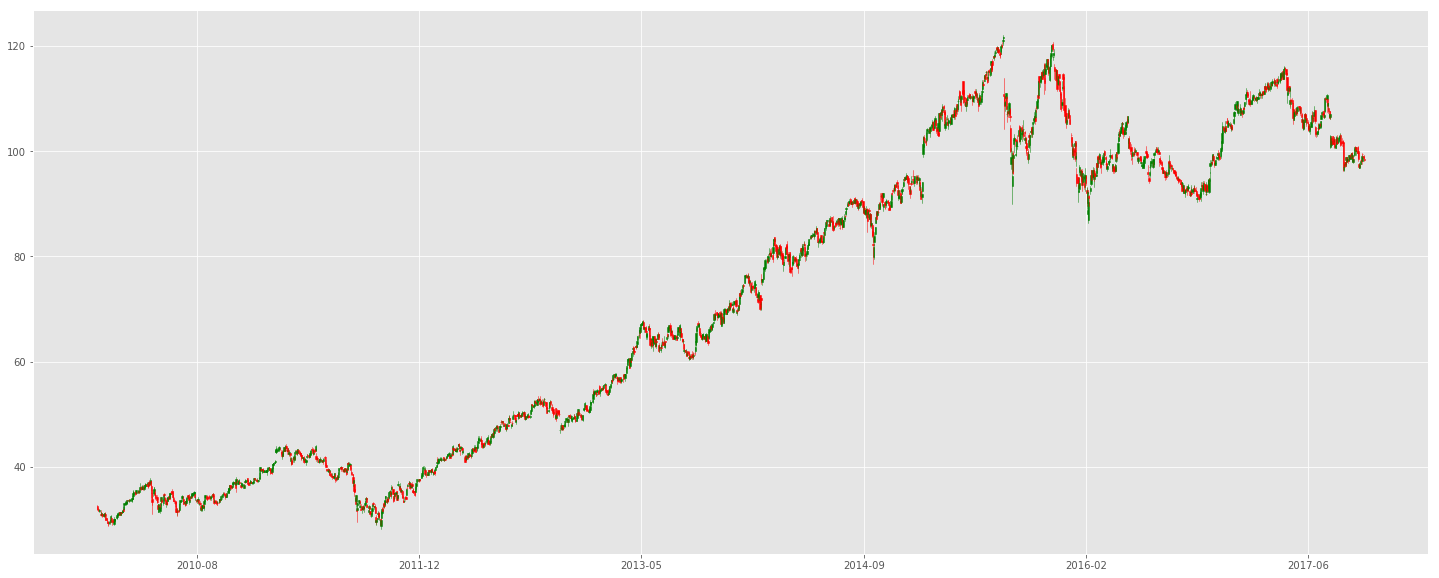

In [4]:
### Draw candlestick chart for Disney's stock price

from matplotlib.finance import candlestick_ohlc
from matplotlib.dates import num2date
import matplotlib.dates as mdates


f1, ax = plt.subplots(figsize = (25,10))

# convert date format for ohlc to operate
df['Date'] = df.index.map(mdates.date2num)
ohlc = df[['Date','Open','High','Low','Close']]

# plot the candlesticks
candlestick_ohlc(ax, ohlc.values, width=3,colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# other parameters
ax.grid(True)


# Change chart size
plt.show()

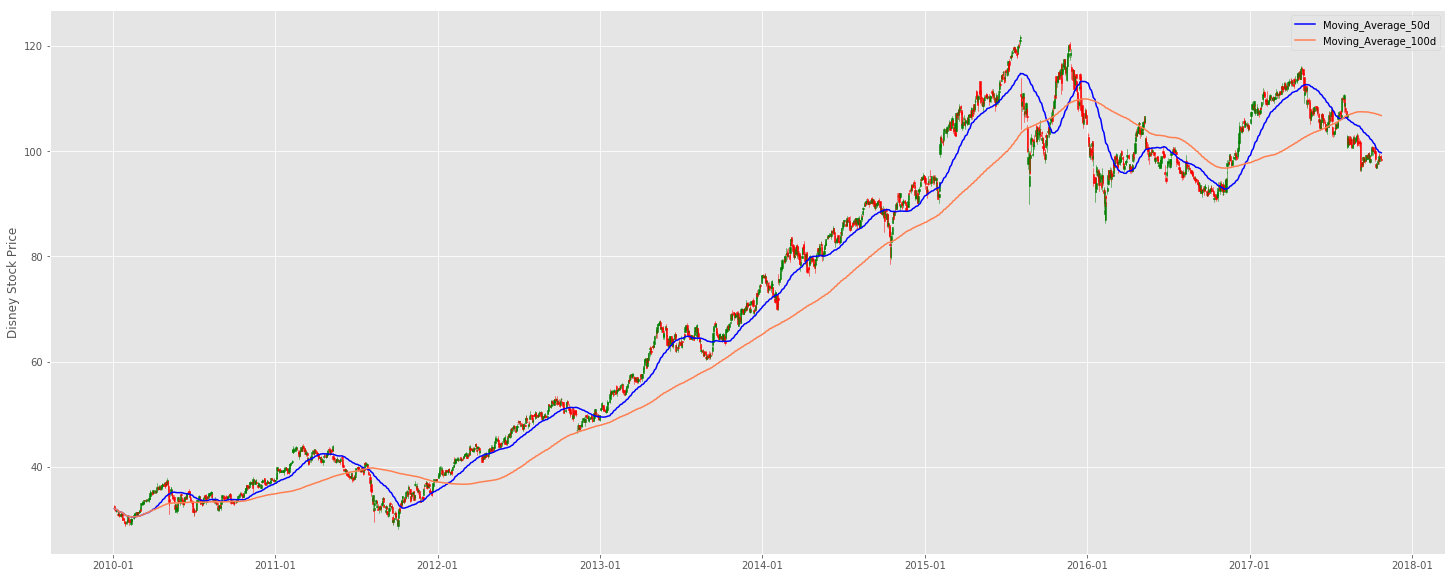

In [5]:
### Use Simple Moving Average(SMA) strategy
### Cost:SMA timeseries lag the original price timeseries, which means that changes in the trend are only seen with a delay (lag) of L days, which can significantly affect our strategy.
### L = (length of window)/2 roughly.

fig = plt.figure(figsize=(25, 10))


# Initialize the short and long windows
short_window = 50
long_window = 200

# Define chart size
ax = fig.add_subplot(111,ylabel = 'Disney Stock Price')


# convert date format for ohlc to operate
df['Date'] = df.index.map(mdates.date2num)
ohlc = df[['Date','Open','High','Low','Close']]

# plot the candlesticks
candlestick_ohlc(ax, ohlc.values, width=3, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


# compute the simple moving average
df['short_rolling'] = df['Close'].rolling(window=short_window, min_periods=1, center=False).mean()
df['long_rolling'] = df['Close'].rolling(window=long_window, min_periods=1, center=False).mean()


# plot the moving average lines
ax.plot(df.index, df['short_rolling'], color = 'blue', label = 'Moving_Average_50d')
ax.plot(df.index, df['long_rolling'], color = 'coral', label = 'Moving_Average_100d')


# Change chart size
plt.legend()
plt.show()

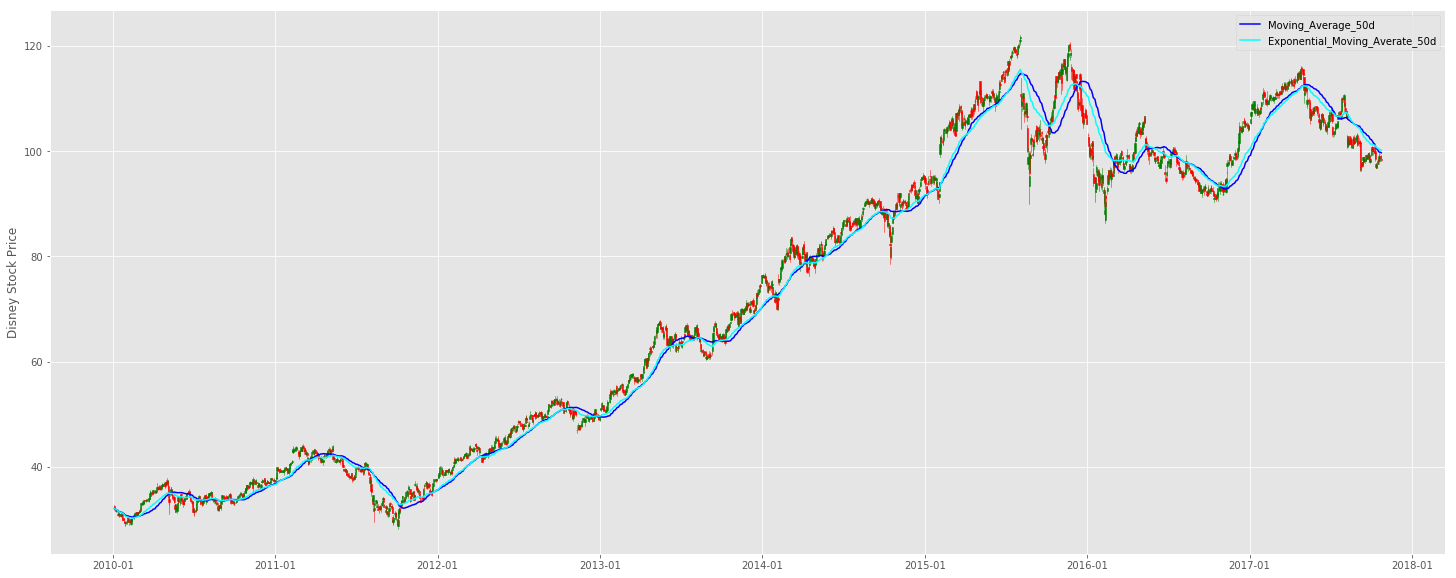

In [14]:
### Use Exponential Moving Average(EMA) strategy
### EMA can help reduce the lag because it puts more weights on more recent observations
fig = plt.figure(figsize=(25, 10))

df['short_ema']= df['Close'].ewm(span=short_window, min_periods=1).mean()

ax = fig.add_subplot(111,ylabel = 'Disney Stock Price')

# plot the candlesticks
candlestick_ohlc(ax, ohlc.values, width=3, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# compute the simple moving average
df['short_rolling'] = df['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# plot the moving average lines
ax.plot(df.index, df['short_rolling'], color = 'blue', label = 'Moving_Average_50d')
ax.plot(df.index, df['short_ema'], color = 'cyan',label = 'Exponential_Moving_Averate_50d')


# Change chart size
plt.legend()
plt.show()


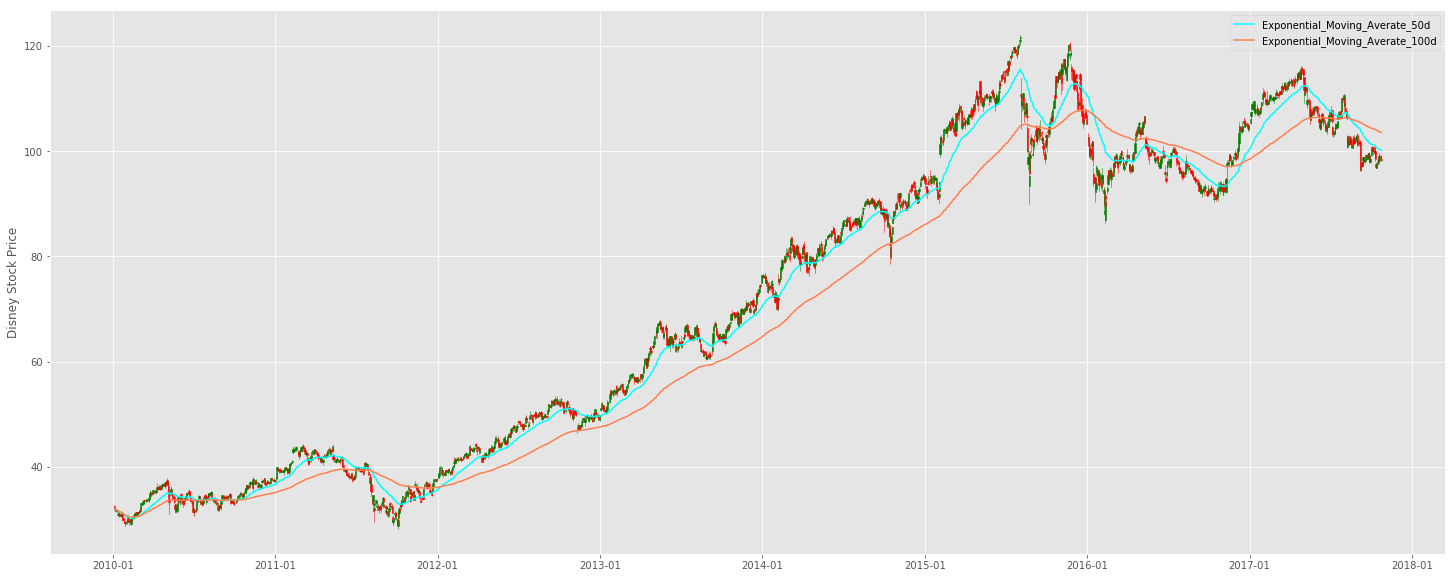

In [19]:
### Draw short_term and long_term moving average lines using EMA
fig = plt.figure(figsize=(25, 10))

df['short_ema']= df['Close'].ewm(span=short_window, min_periods=1).mean()
df['long_ema']= df['Close'].ewm(span=long_window, min_periods=1).mean()

ax = fig.add_subplot(111,ylabel = 'Disney Stock Price')

# plot the candlesticks
candlestick_ohlc(ax, ohlc.values, width=3, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


# plot the moving average lines
ax.plot(df.index, df['short_ema'], color = 'cyan',label = 'Exponential_Moving_Averate_50d')
ax.plot(df.index, df['long_ema'], color = 'coral',label = 'Exponential_Moving_Averate_100d')

# Change chart size
plt.legend()
plt.show()



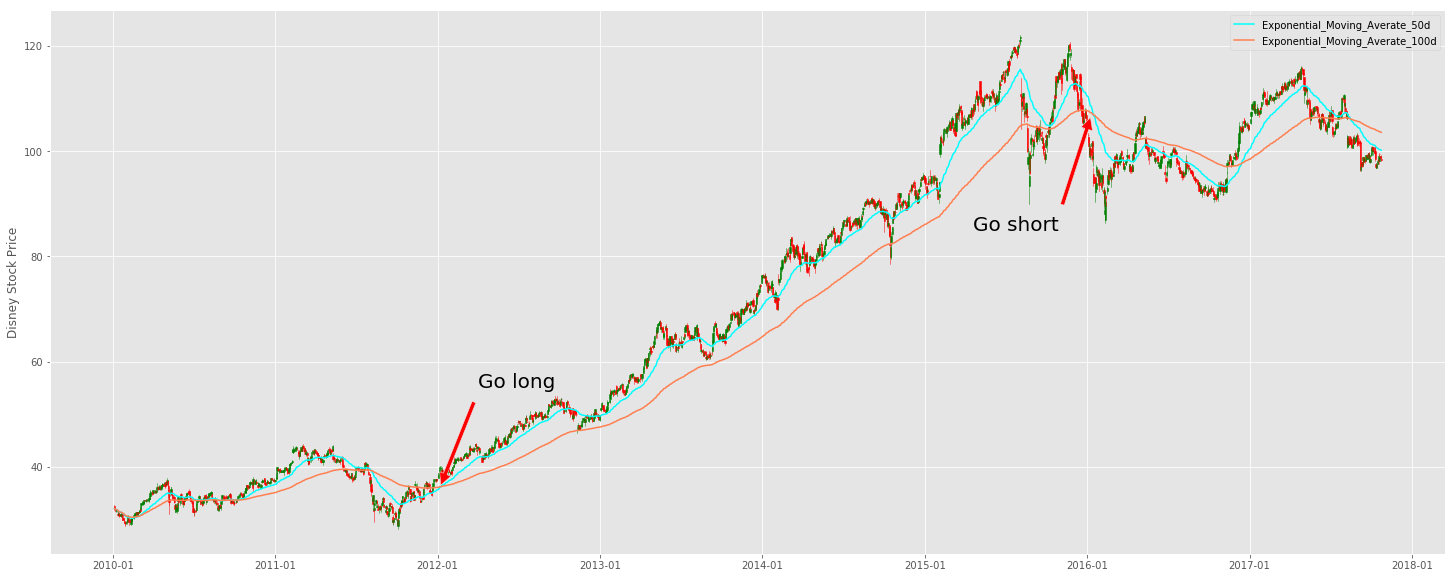

In [56]:
### Identify "Go Short" & "Go Long" ignals in chart
fig = plt.figure(figsize=(25, 10))

df['short_ema']= df['Close'].ewm(span=short_window, min_periods=1).mean()
df['long_ema']= df['Close'].ewm(span=long_window, min_periods=1).mean()

ax = fig.add_subplot(111,ylabel = 'Disney Stock Price')

# plot the candlesticks
candlestick_ohlc(ax, ohlc.values, width=3, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


# plot the moving average lines
ax.plot(df.index, df['short_ema'], color = 'cyan',label = 'Exponential_Moving_Averate_50d')
ax.plot(df.index, df['long_ema'], color = 'coral',label = 'Exponential_Moving_Averate_100d')

# plot annotation
ax.annotate('Go long', xy=('2012-01',35),xytext=('2012-04',55),size =20,arrowprops = dict(facecolor ='red',shrink =0.08),)

# plot annotation
ax.annotate('Go short', xy=('2016-01-15',108),xytext=('2015-4-20',85),size =20,arrowprops = dict(facecolor ='red',shrink =0.08),)

# Change chart size
plt.legend()
plt.show()

/Users/Fanny/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


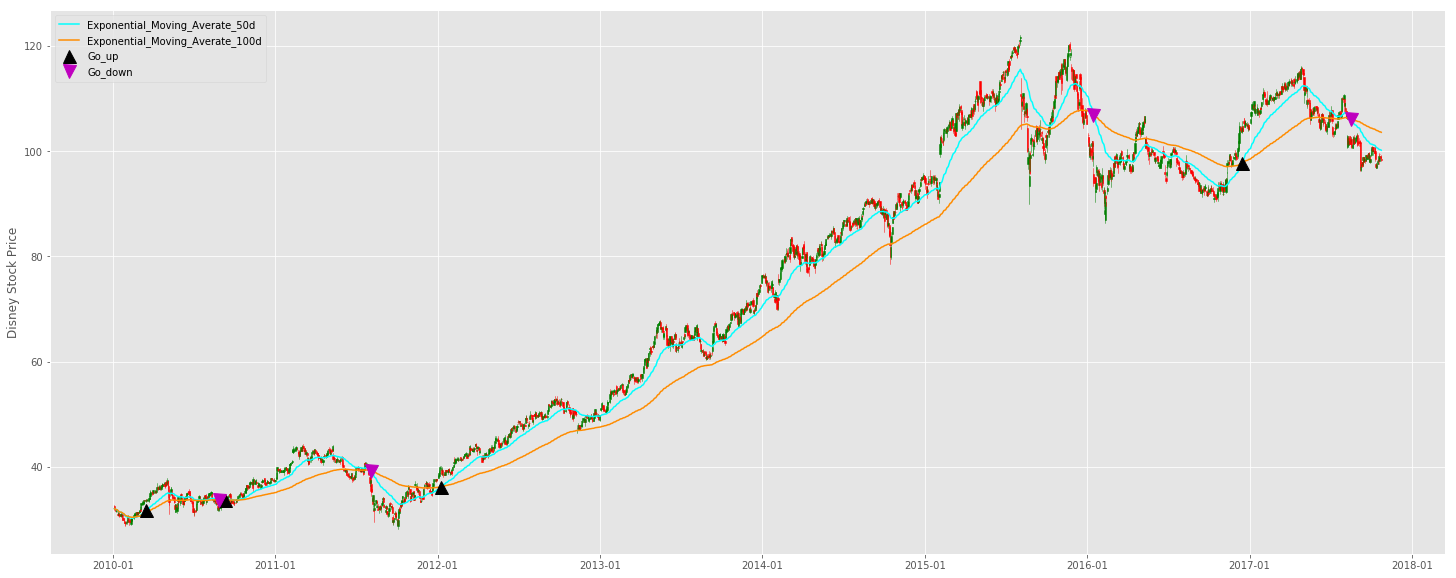

In [43]:
### Plot Signals
fig = plt.figure(figsize=(25, 10))


# Initialize the short and long windows
short_window = 50
long_window = 200


ax = fig.add_subplot(111,ylabel = 'Disney Stock Price')


# convert date format for ohlc to operate
df['Date'] = df.index.map(mdates.date2num)
ohlc = df[['Date','Open','High','Low','Close']]

# plot the candlesticks
candlestick_ohlc(ax, ohlc.values, width=3, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))


# Initiate signal column = 0.0
df['signal'] = 0.0


# plot the moving average lines
ax.plot(df.index, df['short_ema'], color = 'cyan',label = 'Exponential_Moving_Averate_50d')
ax.plot(df.index, df['long_ema'], color = 'darkorange',label = 'Exponential_Moving_Averate_100d')


# Create signals
df['signal'][short_window:] = np.where(df['short_ema'][short_window:] 
                                            > df['long_ema'][short_window:], 1.0, 0.0) 


# Generate trading orders
df['positions'] = df['signal'].diff()


# Plot the buy signals
ax.plot(df.loc[df.positions == 1.0].index,df.short_ema[df.positions == 1.0],'^', markersize=13, color='k',label ='Go_up')

# Plot the sell signals
ax.plot(df.loc[df.positions == -1.0].index,df.short_ema[df.positions == -1.0],'v',markersize=13, color='m',label ='Go_down')


# Change chart size
plt.legend()
plt.show()

Conduct backtesting to generate orders and analysis profitability of our trading strategy

In [50]:

# Set initial capital
initial_capital = float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=df.index).fillna(0.0)

# Buy in 100 shares whenever signal =1
positions['DIS'] = 100*df['signal']  

# Initialize the portfolio with value owned   
portfolio = positions.multiply(df['Adj Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Create holdings column
portfolio['holdings'] = (positions.multiply(df['Adj Close'], axis=0)).sum(axis=1)
# Create cash column to count the rest of cash

portfolio['cash'] = initial_capital - (pos_diff.multiply(df['Adj Close'], axis=0)).sum(axis=1).cumsum()   

# Add total column
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add returns column 
portfolio['returns'] = portfolio['total'].pct_change()

print (portfolio.head())


            DIS  holdings      cash     total  returns
Date                                                  
2010-01-04  0.0       0.0  100000.0  100000.0      NaN
2010-01-05  0.0       0.0  100000.0  100000.0      0.0
2010-01-06  0.0       0.0  100000.0  100000.0      0.0
2010-01-07  0.0       0.0  100000.0  100000.0      0.0
2010-01-08  0.0       0.0  100000.0  100000.0      0.0


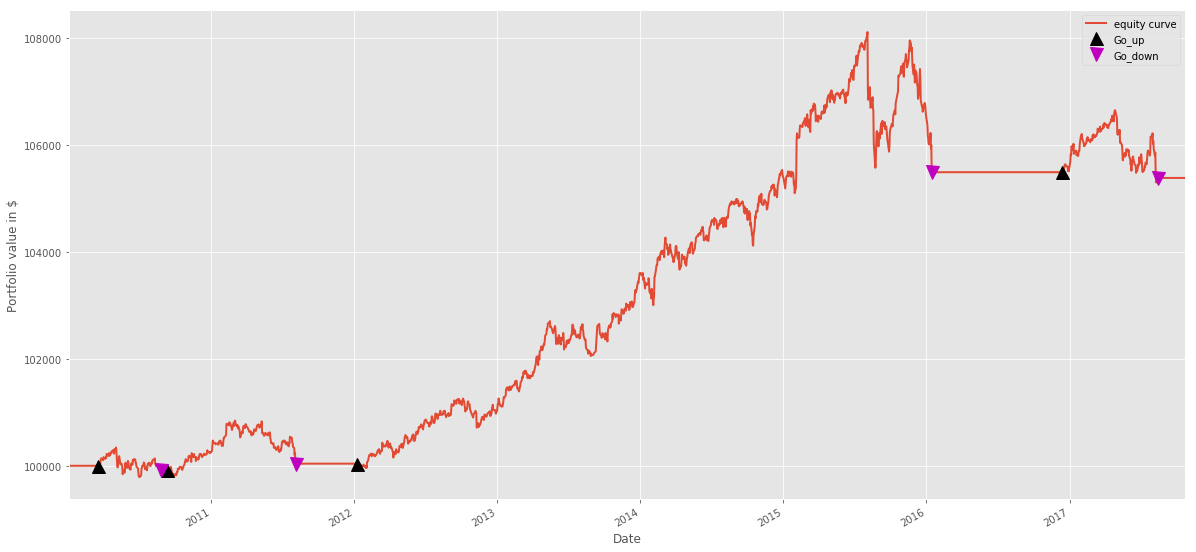

In [51]:
### Draw equity curve 
# Create a figure
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax, lw=2.,label = 'equity curve')

ax.plot(portfolio.loc[df.positions == 1.0].index,portfolio.total[df.positions == 1.0],'^', markersize=13, color='k',label ='Go_up')
ax.plot(portfolio.loc[df.positions == -1.0].index,portfolio.total[df.positions == -1.0],'v', markersize=13, color='m',label ='Go_down')

# Show the plot
plt.legend()
plt.show()

In [52]:
###Conclusion: As can be seen the strategy is profitable by improving profitability 5.5% over the 8-year period, with 4 round-trip trades. After a slightly upwardf trend since 2010 to the middle of 2011,follows a continues upsurge starting from 2012, and continues for almost 4 years 

In [52]:
### Calculate Sharpe Ratio

# Isolate portfolio return
returns = portfolio['returns']

# Calculate Sharpe ratio using yearly trading days(252) and daily return.
sharpe_ratio = np.sqrt(252)*(returns.mean())/returns.std()

#print
print(sharpe_ratio)

0.58361749934


In [ ]:
### Conclusion: investors can get 58% more return if they would like to take 1 more additional reisk

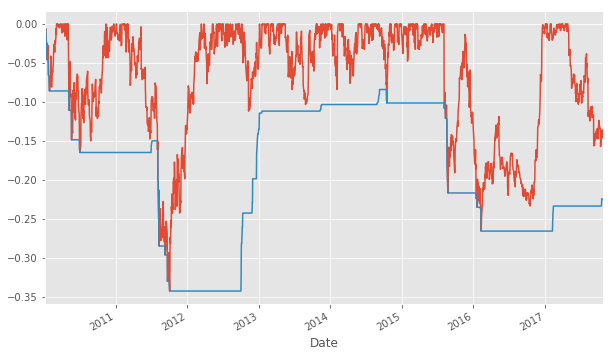

In [7]:
### Calculate Maximum Drawdown

fig = plt.figure(figsize=(10, 6))

# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day 
rolling_max = df['Adj Close'].rolling(window, min_periods=1).max()
daily_drawdown = df['Adj Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

In [ ]:
###Conclustion: the largest single drop from peak to bottom until a new peak is achieved;Red is daily running 252-day drawdown, blue is maximum experienced 252-day drawdown in the past year

In [55]:
###Calculate Compound Year Growth Rate
# Get the number of days in `aapl`
days = (df.index[-1] - df.index[0]).days

# Calculate the CAGR 
cagr = ((((df['Adj Close'][-1]) / df['Adj Close'][1])) ** (365.0/days)) - 1

# Print the CAGR
print(cagr)

0.169815125146
